# Electrons and Positrons

pynucastro provides an electron-positron EOS.  We will explore that here.

```{warning}
The `ElectronEOS` can be slow because it is solving for the degeneracy parameter,
$\eta$, and doing all of the integrals at high precision.
```

In [1]:
import pynucastro as pyna

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

Once we create an `ElectronEOS`, we can access the thermodynamics via the
`pe_state` function.

In [3]:
es = pyna.eos.ElectronEOS()

We'll create a grid of temperature and density and compute the thermodynamic quantities at each point.

In [4]:
Ts = np.logspace(4, 9, 26)
rhos = np.logspace(-4, 9, 66)

In [5]:
eta = np.zeros((len(rhos), len(Ts)))
n_e = np.zeros((len(rhos), len(Ts)))
n_pos = np.zeros((len(rhos), len(Ts)))

The only role composition plays in this EOS is determining the number density
of electrons (assuming full ionization) via $Y_e$.

In [6]:
comp = pyna.Composition(["he4"])
comp.set_equal()

In [7]:
for ir, rho in enumerate(rhos):
    for it, T in enumerate(Ts):
        state = es.pe_state(rho, T, comp, compute_derivs=False)
        eta[ir, it] = state.eta
        n_e[ir, it] = state.n_e
        n_pos[ir, it] = state.n_pos        

At low density and very high temperatures ($kT \sim m_e c^2$), we can create electron positron pairs.  Here we plot the fraction of positrons to the total number of electrons and positrons.

In [8]:
y = (n_pos / (n_pos + n_e))
y.min(), y.max()

(np.float64(0.0), np.float64(0.499999986135348))

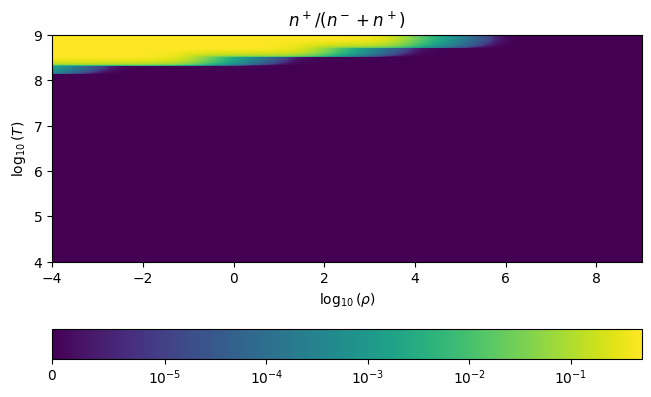

In [11]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
im = ax.imshow(y.T, origin="lower",
               norm=colors.SymLogNorm(linthresh=1.e-5, vmin=1.e-50, vmax=0.5, clip=True),
               extent=[np.log10(rhos.min()), np.log10(rhos.max()),
                       np.log10(Ts.min()), np.log10(Ts.max())],
               interpolation="bilinear")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(T)$")
ax.set_title(r"$n^+ / (n^- + n^+)$")
fig.colorbar(im, ax=ax, orientation="horizontal")

We see that we have nearly equal numbers of electrons and positrons at very low densities and high temperatures.